In [3]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph import add_messages
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph , START , END
from dotenv import load_dotenv

In [2]:
class State (TypedDict) : 
    messages : Annotated[list , add_messages]

In [7]:
import os

load_dotenv()

True

In [22]:
llm = ChatGroq(
    model="openai/gpt-oss-120b",
    temperature=0
)

In [23]:
def brain(state:State) : 
    return {"messages" : [llm.invoke(state['messages'])]}

In [19]:
graph = StateGraph(State)


graph.add_node("Brain" , brain)


graph.add_edge(START,"Brain")
graph.add_edge("Brain",END)

graph = graph.compile()

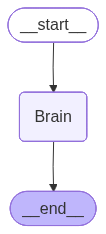

In [20]:
from IPython.display import display, Image
display(Image(data=graph.get_graph().draw_mermaid_png()))

In [27]:
for event in graph.stream({"messages" : "HI , Groq"}) : 
    print(event)

{'Brain': {'messages': [AIMessage(content='Hello! 👋 How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "HI , Groq". Likely they are greeting and maybe want to talk about Groq? The system says "You are ChatGPT". The user says "HI , Groq". Could be they want a response. Probably respond politely, ask how can I help.'}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 75, 'total_tokens': 154, 'completion_time': 0.181160834, 'completion_tokens_details': {'reasoning_tokens': 59}, 'prompt_time': 0.002824227, 'prompt_tokens_details': None, 'queue_time': 0.038723595, 'total_time': 0.183985061}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_3c6f17fc9c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--a29bee99-6997-4d50-8b0c-c88f151c2b38-0', usage_metadata={'input_tokens': 75, 'output_tokens': 79, 'total_tokens': 154, 'output_token_details': {'reasoning': 